# 多項式計算ができる

In [3]:
from sympy import Symbol
x = Symbol('x')
x + x + 1

2*x + 1

In [5]:
from sympy import Symbol
x = Symbol('x')
print(x + x + 1)
print(x * x + 2 * x + 1)
print(x**3 + 3 * x**2 + 3**x + 1)
print((x+1)**3)

2*x + 1
x**2 + 2*x + 1
3**x + x**3 + 3*x**2 + 1
(x + 1)**3


# 変数とシンボルのアルファベットは同じでなくてもいい

In [9]:
from sympy import Symbol

a = Symbol('x')
print(a + a + 1)

x = Symbol('x')
# 変数がどのアルファベットを表しているか調べる
print(a.name)
print(x.name)

# x, y のように 1 文字でなくてもいい
b = Symbol('test')
print(b.name)
print(b**2 + 2 * b + 1)

2*x + 1
x
x
test
test**2 + 2*test + 1


# 複数のシンボルを一気に定義できる

In [13]:
from sympy import symbols
x,y,z = symbols('x,y,z')
s = x * y + x * y
print(s)

# 簡単な計算なら処理してしまう
p = x * (x + x)
print(p)

# 少し複雑になると展開などの処理はしない
p = (x + 2)*(x + 3)
print(p)

2*x*y
2*x**2
(x + 2)*(x + 3)


# factor, expand

In [18]:
from sympy import Symbol
from sympy import factor, expand
x = Symbol('x')
y = Symbol('y')

# 因数分解
expr = x**2 - y**2
f_tmp = factor(expr)
print(f_tmp)

# 展開
e_tmp = expand(f_tmp)
print(e_tmp)

# 3 次式
expr = x**3 + 3*x**2*y + 3*x*y**2 + y**3
factors = factor(expr)
print(factors)
print(expand(factors))

(x - y)*(x + y)
x**2 - y**2
(x + y)**3
x**3 + 3*x**2*y + 3*x*y**2 + y**3


# prettyprint

http://docs.sympy.org/dev/tutorial/printing.html を見ると tex が入っていたりすると tex のタイプセットで出力してくれる模様。

In [20]:
from sympy import pprint
from sympy import Symbol
from sympy import factor, expand
x = Symbol('x')
y = Symbol('y')

expr = x*x + 2*x*y + y*y
print(expr)
pprint(expr)

expr = 1 + 2*x + 2*x**2
pprint(expr)

x**2 + 2*x*y + y**2
 2            2
x  + 2⋅x⋅y + y 
   2          
2⋅x  + 2⋅x + 1


## 多項式の順序反転
http://docs.sympy.org/dev/tutorial/printing.html を見るとオプションいろいろ書いてある。

In [21]:
from sympy import init_printing
init_printing(order='rev-lex')
pprint(expr)

             2
1 + 2⋅x + 2⋅x 


# 級数の表示

In [23]:
from sympy import Symbol, pprint, init_printing
def get_some_series(n):
    """n 次の適当な級数"""
    x = Symbol('x')
    series = x
    for i in range(2, n + 1):
        series = series + (x ** i) / i

    return series

n = 10
series = get_some_series(int(n))

# 逆順プリントを強制
init_printing(order='rev-lex')
pprint(series)

     2    3    4    5    6    7    8    9    10
    x    x    x    x    x    x    x    x    x  
x + ── + ── + ── + ── + ── + ── + ── + ── + ───
    2    3    4    5    6    7    8    9     10


# 代入

In [26]:
from sympy import Symbol, pprint
x = Symbol('x')
y = Symbol('y')

expr = x*x + x*y + x*y + y*y
res = expr.subs({x:1, y:2})
pprint(res)

# 文字も代入できる: 辞書で指定
pprint(expr.subs({x:1-y}))

9
       2                  2
(1 - y)  + 2⋅y⋅(1 - y) + y 


# 多項式を簡素に

In [30]:
from sympy import Symbol, pprint
from sympy import simplify
x = Symbol('x')
y = Symbol('y')

expr = x*x + x*y + x*y + y*y

expr_subs = expr.subs({x:1-y})
pprint(expr_subs)
pprint(simplify(expr_subs))

       2                  2
(1 - y)  + 2⋅y⋅(1 - y) + y 
1


# 級数の評価

In [36]:
from sympy import Symbol, pprint, init_printing
def get_some_series(n, x_value):
    """ある有限級数の表示"""
    x = Symbol('x')
    series = x
    for i in range(2, n + 1):
        series = series + (x ** i) / i
        
    return series


# Initialize printing system with reverse order
init_printing(order='rev-lex')

# 何項目まで表示させるか
n = 5
# 評価する x の値
x_value = 3

# 級数の値の評価
series = get_some_series(n, x_value)
series_value = series.subs({x:x_value})
print('x = {0} での級数の値: {1}'.format(x_value, series_value))

x = 3 での級数の値: 1707/20


# 文字列を式に

In [39]:
from sympy import sympify, pprint
init_printing(order='lex')
expr = "x**2 + 3*x + x**3 + 2*x"
expr = sympify(expr)
pprint(expr)

# 式全体を 2 倍にできる
pprint(2 * expr)

 3    2      
x  + x  + 5⋅x
   3      2       
2⋅x  + 2⋅x  + 10⋅x


# 方程式を解く

In [40]:
from sympy import Symbol, solve
x = Symbol('x')
expr = x - 5 - 7
sol = solve(expr)
pprint(sol)

[12]


## 二次方程式

In [42]:
from sympy import solve
x = Symbol('x')
expr = x**2 + 5*x + 4
print(solve(expr, dict=True))

x = Symbol('x')
expr = x**2 + x + 1
print(solve(expr, dict=True))

[{x: -4}, {x: -1}]
[{x: -1/2 - sqrt(3)*I/2}, {x: -1/2 + sqrt(3)*I/2}]


## 一般の二次方程式

In [44]:
x = Symbol('x')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
expr = a*x*x + b*x + c

pprint(solve(expr, x, dict=True))

⎡⎧           _____________⎫  ⎧    ⎛       _____________⎞ ⎫⎤
⎢⎪          ╱           2 ⎪  ⎪    ⎜      ╱           2 ⎟ ⎪⎥
⎢⎨   -b + ╲╱  -4⋅a⋅c + b  ⎬  ⎨   -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎬⎥
⎢⎪x: ─────────────────────⎪, ⎪x: ────────────────────────⎪⎥
⎣⎩            2⋅a         ⎭  ⎩             2⋅a           ⎭⎦


## 連立一次方程式

In [46]:
x = Symbol('x')
y = Symbol('y')
expr1 = 2*x + 3*y - 6
expr2 = 3*x + 2*y - 12
pprint(solve((expr1, expr2), dict=True))

[{x: 24/5, y: -6/5}]


# Sympy を使ったプロット

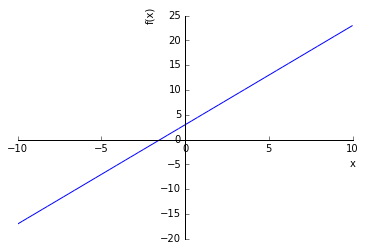

In [49]:
%matplotlib inline
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(2 * x + 3)

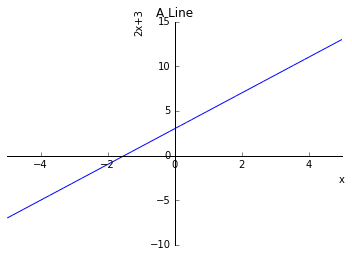

In [51]:
## 定義域の制限
%matplotlib inline
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(2 * x + 3, (x, -5, 5), title='A Line', xlabel='x', ylabel='2x+3')

## 陰関数の表示

x**2 + y**3 + 2
[(-x**2 - 2)**(1/3), -(-x**2 - 2)**(1/3)/2 - sqrt(3)*I*(-x**2 - 2)**(1/3)/2, -(-x**2 - 2)**(1/3)/2 + sqrt(3)*I*(-x**2 - 2)**(1/3)/2]


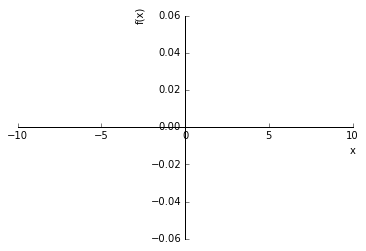

In [54]:
%matplotlib inline
from sympy import Symbol, sympify, solve
from sympy.plotting import plot

expr = "x**2 + y**3 + 2"
expr = sympify(expr)
print(expr)
y = Symbol('y')
solutions = solve(expr, y)
print(solutions)
expr_y = solutions[0]
plot(expr_y)

## 複数の関数のプロット

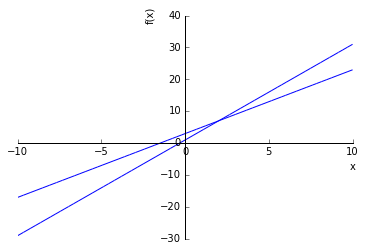

In [55]:
%matplotlib inline
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(2*x+3, 3*x+1)

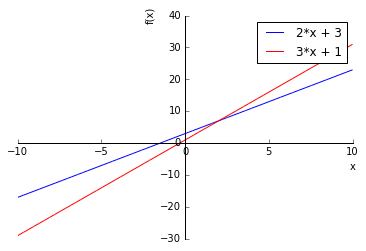

In [56]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
p = plot(2*x+3, 3*x+1, legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

## 不等式を解く

In [57]:
from sympy import Symbol, sympify, SympifyError
from sympy import solve_poly_inequality, solve_rational_inequalities
from sympy import solve_univariate_inequality, Poly
from sympy.core.relational import Relational, Equality
def isolve(ineq_obj):
    """不等式を解く"""
    x = Symbol('x')
    # 不等式の左辺を取る
    expr = ineq_obj.lhs
    # 関係演算子の取得
    rel = ineq_obj.rel_op

    if expr.is_polynomial():
        # 式が多項式の場合
        p = Poly(expr, x)
        return solve_poly_inequality(p, rel)
    elif expr.is_rational_function():
        # 式が有理式の場合
        p1, p2 = expr.as_numer_denom()
        num = Poly(p1)
        denom = Poly(p2)
        return solve_rational_inequalities([[((num, denom), rel)]])
    else:
        return solve_univariate_inequality(ineq_obj , x, relational=False)

ineq = "x**2 - 4 > 0"
ineq_obj = sympify(ineq)
print(isolve(ineq_obj))

[(-oo, -2), (2, oo)]
